1. using gangsafb_3.csv to train data.
2. using count vectorization.
3. using multinominal naive bayes.
4. using testingname_1 csv for testing.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
print(tf.__version__)
import sys
print(sys.version)
print("GPU: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.11.0
3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
GPU:  0


In [4]:
# gangsa.csv
df = pd.read_csv('gangsafb_3.csv')

In [5]:
df.head()

,NAMA,BANGSA
0,Aaron Amy Au Thin,CINA
1,Aaron Yew,CINA
2,ABBYGAIL ONG YUEN MUN,CINA
3,ABBYGAIL ONG YUEN MUNH,CINA
4,MIMIE SHUHADAH BINTI SUARDI,MELAYU


### shuffle dataset

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.shape

(30241, 2)

In [8]:
df.head()

,NAMA,BANGSA
0,MOHD SHAZRIL BIN ABD MAJID,MELAYU
1,NUR AZLIN BINTI SAMSOL,MELAYU
2,SITI NUR HIDAYAH BT IMRAN,MELAYU
3,TUAH IZZUWAN BIN AMINNUDIN,MELAYU
4,LUQMANUL HAKIM BIN ZAINAL ABIDIN,MELAYU


### data cleaning

In [13]:
df.columns

Index(['NAMA', 'BANGSA'], dtype='object')

In [9]:
df['NAMA']

0              MOHD SHAZRIL BIN ABD MAJID
1                  NUR AZLIN BINTI SAMSOL
2               SITI NUR HIDAYAH BT IMRAN
3              TUAH IZZUWAN BIN AMINNUDIN
4        LUQMANUL HAKIM BIN ZAINAL ABIDIN
                       ...               
30236                       GAN CHAI NGOR
30237               AKMAL HAZIM BIN AZIZI
30238       NURUL HAZIRAH BT BADRUL FIKLI
30239                       TAY HUI CHING
30240        MUHAMMAD HAIQALL BIN SULIMAN
Name: NAMA, Length: 30241, dtype: object

In [ ]:
# put into tolist() so data can be trained
df['NAMA'].tolist()

['MOHD SHAZRIL BIN ABD MAJID',
 'NUR AZLIN BINTI SAMSOL',
 'SITI NUR HIDAYAH BT IMRAN',
 'TUAH IZZUWAN BIN AMINNUDIN',
 'LUQMANUL HAKIM BIN ZAINAL ABIDIN',
 'ZETTY AZLIYANA BINTI AZHAR',
 'MUHAMMAD ANAS BIN ANUAR',
 'NURUL NAZIRAH BINTI IBRAHIM',
 'LOH YAN NING',
 'VINITHA AP KUMARAN',
 'Yumi Lai',
 'AHMAD FAQIEMI BIN MOHD NAJEB',
 'ASIAH BINTI ZAINUDIN',
 'LIINESH AL SELLVANDAN',
 'SITI NUR ZULAIKHA BINTI HAMDAN',
 'NORLAILA BINTI JAAFAR',
 'MUHAMMAD NAZIRUL IMAN BIN ROSLI',
 'Mohamad Fikri Bin Haris',
 'Hah Shi En',
 'MUHAMMAD ASHRAF BIN RUSLIM',
 'VENTREN NAIR AL SEGERAN',
 'MYRONNE BIN JOHN',
 'MUHAMMAD SUKRI BIN ZULKIFLI',
 'Kuddy Ponnu Nismi',
 'Sathish Sony',
 'MAHANTHIRAN AL ANNATHARAJAH',
 'ROSALINDAH ROBINSON',
 'NUR HASYA DALILI BT MOHD AMIN',
 'YEN PUI SAN',
 'VISHVENEY AP MANIVANNAN',
 'NURUL AISYAH BT KAMARUL ZAMAN',
 'NURUL SHAFIQAH AINA BINTI  MAIDU',
 'MUHAMMAD ALIF B AYUB',
 'MUHAMMAD FARHAN MOHD NAZIP',
 'Tugang Palus',
 'NORSAZLIN BINTI MUHD NAZRI',
 'MUHAMMAD FARIZ

In [12]:
df_tolist = df[df['BANGSA'] == 'LAIN-LAIN']['NAMA']
df_tolist.tolist()

['MYRONNE BIN JOHN',
 'ROSALINDAH ROBINSON',
 'Tugang Palus',
 'CORINA ANAK KEMARAU',
 'Marsel Tasy Uma Klot',
 'Gurpreet Singh',
 'JESLINA TOMAS',
 'ABBY MUIE NAKA MULENG',
 'Dany Aby',
 'James Jimbun',
 'Molie Molie',
 'NATASHA ANAK CHARLIE',
 'SHAIDATUL SHIMA BTE WARTO  SALIM',
 'JEOFFEREDDY JEOFFERY',
 'SHELLA JUNAIDI',
 'Inik Momon',
 'LSIAH MARTHEN',
 'KHAIROL ELWAY KASIH',
 'Apai Kibin',
 'CLIFF  PHANG',
 'SURIANI ALWIS',
 'TOBY ANAK WILSON',
 'Jeannea Samantha Sambo',
 'Thomas Tibang',
 'Bandi Jelpang',
 'THYMOTHY ANAK MELLY',
 'Jasonjess Jess',
 'CHERISSEY ENDANG AK MAKTRI',
 'Bisopchenkie Beh',
 'Imelsandro Zakin Mellwinn',
 'TEGUH FIRDAUS BIN DESFAZI',
 'RIO ABIL',
 'GABRIEL ANAK MATHEW',
 'FERGUSON ADAM ANAK JECKELLY',
 'MERRYLIN JIMMY',
 'AGNESS MARTHA AK STEWART',
 'ALEX RUBIN ANAK SIYUNG TOMIS',
 'Tomy Kbm Tomy Kbm',
 'Rickey Asir',
 'Klnopo Bou',
 'Salvia Sebi',
 'PRISCILLA RONNY JAMES SPISOL',
 'JOSEH POEL',
 'TIARA JACQUELINE MERECHA',
 'Iba Kanyan',
 'RACHEL ROSSELIN

In [ ]:
# convert every string into lowercase
df['NAMA'] = df['NAMA'].str.lower()
df['BANGSA'] = df['BANGSA'].str.lower()

In [15]:
df['BANGSA'].unique()

array(['melayu', 'cina', 'india', 'lain-lain'], dtype=object)

In [ ]:
# remove any missing value
df.dropna(how='any', inplace=True)

In [17]:
df.shape

(30241, 2)

In [18]:
df['BANGSA'].value_counts()

melayu       21939
cina          3548
india         2523
lain-lain     2231
Name: BANGSA, dtype: int64

In [19]:
df['BANGSA'].unique()

array(['melayu', 'cina', 'india', 'lain-lain'], dtype=object)

In [20]:
longest_name = max(df['NAMA'], key = len)
longest_name

'nurizzatul aini binti noor indra pahlawan mohammad najib'

In [ ]:
# removing leading and trailing whitespace
df['NAMA'] = df['NAMA'].str.strip()

In [22]:
longest_name = max(df['NAMA'], key = len)
longest_name

'nurizzatul aini binti noor indra pahlawan mohammad najib'

In [23]:
df['NAMA']

0              mohd shazril bin abd majid
1                  nur azlin binti samsol
2               siti nur hidayah bt imran
3              tuah izzuwan bin aminnudin
4        luqmanul hakim bin zainal abidin
                       ...               
30236                       gan chai ngor
30237               akmal hazim bin azizi
30238       nurul hazirah bt badrul fikli
30239                       tay hui ching
30240        muhammad haiqall bin suliman
Name: NAMA, Length: 30241, dtype: object

In [24]:
# check if have low letter
alphabet = df['NAMA'].str.contains(r'[a-z]').any()

if alphabet:
    print("Yes, lowercase letter detected.")
else:
    print("No lowercase letter detected.")

Yes, lowercase letter detected.


In [25]:
df.columns

Index(['NAMA', 'BANGSA'], dtype='object')

In [26]:
df['BANGSA'].unique()

array(['melayu', 'cina', 'india', 'lain-lain'], dtype=object)

In [27]:
class_names = ['melayu', 'cina', 'india', 'lain-lain']

In [28]:
len(class_names)

4

In [29]:
df.groupby('BANGSA')['NAMA'].size()

BANGSA
cina          3548
india         2523
lain-lain     2231
melayu       21939
Name: NAMA, dtype: int64

In [30]:
Xfeatures = df['NAMA']
ylabels = df['BANGSA']

In [ ]:
# label encoding , converts texts into integers
encoder = LabelEncoder()
y = encoder.fit_transform(ylabels)

In [32]:
# using count vectorization
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [34]:
cv.get_feature_names_out()

array(['aadhil', 'aain', 'aaina', ..., 'zyaid', 'zzainoramaliny',
       'zzaman'], dtype=object)

In [35]:
len(cv.get_feature_names_out())

21596

In [ ]:
import pickle

# Save the count vectorizer
with open('fitted_count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### tensorflow

In [ ]:
# Defining the model
# softmax, turns raw output scores into probabilities, integer into decimal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')  # Output layer with softmax activation for multiclass classification
])

In [39]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since labels are integers, use 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

In [40]:
# Training the model
history = model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
605/605 [==============================] - 5s 7ms/step - loss: 0.2988 - accuracy: 0.8997 - val_loss: 0.1392 - val_accuracy: 0.9568
Epoch 2/10
605/605 [==============================] - 4s 6ms/step - loss: 0.0587 - accuracy: 0.9864 - val_loss: 0.1377 - val_accuracy: 0.9535
Epoch 3/10
605/605 [==============================] - 4s 6ms/step - loss: 0.0139 - accuracy: 0.9974 - val_loss: 0.1472 - val_accuracy: 0.9527
Epoch 4/10
605/605 [==============================] - 4s 6ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.1584 - val_accuracy: 0.9496
Epoch 5/10
605/605 [==============================] - 4s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1603 - val_accuracy: 0.9508
Epoch 6/10
605/605 [==============================] - 4s 6ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1666 - val_accuracy: 0.9523
Epoch 7/10
605/605 [==============================] - 4s 6ms/step - loss: 8.6640e-04 - accuracy: 0.9998 - val_loss: 0.1786 - val_accuracy: 0.9461
Ep

In [41]:
model.save('tensorflow1.h5')

In [ ]:
# convert sparse matrix from CountVectorizer to dense numpy array for model processing
# represent total error @test_loss
# represent test accuracy @test_accuracy
# model.evaluate() indicate how well the trained neural network performs on the Test Set
test_loss, test_accuracy = model.evaluate(X_test.toarray(), y_test)
print("Test Accuracy:", test_accuracy)
print("test error:", test_loss)

190/190 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.9436
Test Accuracy: 0.9436270594596863
test error: 0.22801440954208374


In [ ]:
# Take the test data and outputs a probability matrix
# Identifies index of the highest probability in each row
# Converts back decimal into integer
# Perform final mapping, ie: 1 to list i.e: 'something_a', 'something_b'
predictions = model.predict(X_test.toarray())
predicted_labels_num = predictions.argmax(axis=1)
predicted_labels = encoder.inverse_transform(predicted_labels_num)

190/190 [==============================] - 1s 3ms/step


In [40]:
print(predicted_labels)

['melayu' 'india' 'melayu' ... 'melayu' 'melayu' 'melayu']


In [41]:
cr = classification_report(y_test, predicted_labels_num)

In [42]:
print("model: \n", cr)

model: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       703
           1       0.74      0.94      0.83       510
           2       0.89      0.49      0.63       410
           3       0.98      0.99      0.98      4426

    accuracy                           0.95      6049
   macro avg       0.89      0.84      0.85      6049
weighted avg       0.95      0.95      0.94      6049



In [43]:
conf_matrix = confusion_matrix(y_test, predicted_labels_num)

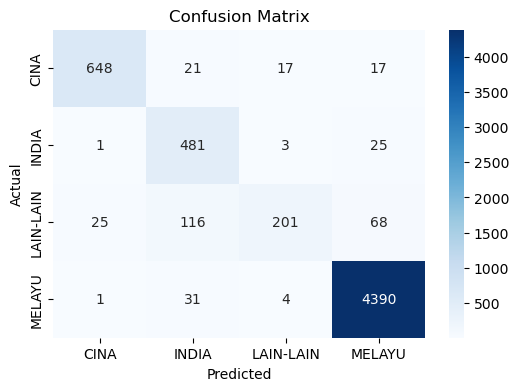

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['CINA', 'INDIA', 'LAIN-LAIN', 'MELAYU'], 
            yticklabels=['CINA', 'INDIA', 'LAIN-LAIN', 'MELAYU'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### using different dataset

In [45]:
df2 = pd.read_csv('testingname_1.csv')

In [46]:
df2.columns

Index(['name', 'race', 'sample', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [47]:
df2.drop(columns=['Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [48]:
df2.columns

Index(['name', 'race', 'sample'], dtype='object')

In [49]:
def strip_non_alpha(text):
    import re
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply the function to the 'name' column
df2['name'] = df2['name'].apply(strip_non_alpha)

In [50]:
df2

,name,race,sample
0,Fowler Peter,lain-lain,lain-lain
1,Rainie Landong,lain-lain,india
2,Sumanth Kumar Parvathala,india,india
3,Priya Khutela,india,india
4,Bhanupriva Amisha Vishwakarma,india,india
5,Ganesan Manohar,india,india
6,Ritik Kapoor,india,india
7,Rakesh Manda,india,india
8,Mohammad Yazdi Bin Harmin,melayu,melayu
9,Mohd Nazri bin mohd nasir,melayu,melayu


In [51]:
model_A = []

In [52]:
def test_model(name):
    X_new = cv.transform(name).toarray()
    predictions_new = model.predict(X_new)
    predicted_labels_new = np.argmax(predictions_new, axis=1)
    predicted_labels = encoder.inverse_transform(predicted_labels_new)
    model_A.append(predicted_labels)

In [53]:
for i in df2['name']:
    test_model([i])

1/1 [==============================] - 0s 12ms/step


In [54]:
model_A

[array(['lain-lain'], dtype=object),
 array(['india'], dtype=object),
 array(['india'], dtype=object),
 array(['india'], dtype=object),
 array(['melayu'], dtype=object),
 array(['india'], dtype=object),
 array(['india'], dtype=object),
 array(['india'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['india'], dtype=object),
 array(['india'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['cina'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['india'], dtype=object),
 array(['cina'], dtype=object),
 array(['melayu'], dtype=object),
 array(['cina'], dtype=object),
 array(['melayu'], dtype=object),
 array(['cina'], dtype=object),
 array(['melayu'], dtype=object),
 array(['melayu'], dtype=object),
 array(['cina'], dtype=objec

In [55]:
modelA = [item[0] for item in model_A]

In [56]:
modelA

['lain-lain',
 'india',
 'india',
 'india',
 'melayu',
 'india',
 'india',
 'india',
 'melayu',
 'melayu',
 'melayu',
 'india',
 'india',
 'melayu',
 'melayu',
 'melayu',
 'melayu',
 'melayu',
 'cina',
 'melayu',
 'melayu',
 'india',
 'cina',
 'melayu',
 'cina',
 'melayu',
 'cina',
 'melayu',
 'melayu',
 'cina',
 'cina',
 'cina',
 'india',
 'cina',
 'cina',
 'cina',
 'cina',
 'cina',
 'india',
 'india',
 'lain-lain',
 'india',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain',
 'lain-lain']

In [57]:
df2['modelA'] = modelA

In [58]:
df2.columns

Index(['name', 'race', 'sample', 'modelA'], dtype='object')

In [59]:
df2

,name,race,sample,modelA
0,Fowler Peter,lain-lain,lain-lain,lain-lain
1,Rainie Landong,lain-lain,india,india
2,Sumanth Kumar Parvathala,india,india,india
3,Priya Khutela,india,india,india
4,Bhanupriva Amisha Vishwakarma,india,india,melayu
5,Ganesan Manohar,india,india,india
6,Ritik Kapoor,india,india,india
7,Rakesh Manda,india,india,india
8,Mohammad Yazdi Bin Harmin,melayu,melayu,melayu
9,Mohd Nazri bin mohd nasir,melayu,melayu,melayu


In [60]:
cm_a = confusion_matrix(df2['race'], modelA)
cr_a = classification_report(df2['race'], modelA)

In [61]:
print("model a: \n", cr_a)

model a: 
               precision    recall  f1-score   support

        cina       1.00      1.00      1.00        12
       india       0.92      0.92      0.92        13
   lain-lain       1.00      0.93      0.97        15
      melayu       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



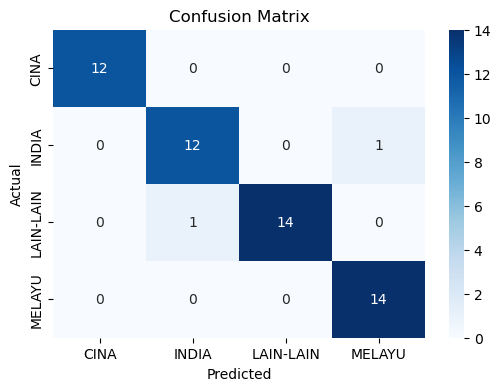

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_a, annot=True, cmap='Blues', fmt='g',
            xticklabels=['CINA', 'INDIA', 'LAIN-LAIN', 'MELAYU'], 
            yticklabels=['CINA', 'INDIA', 'LAIN-LAIN', 'MELAYU'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()